# 통계적 기계 학습 개요

머신러닝은 (대용량) 데이터로부터 패턴을 찾아내는 알고리즘과 이를 성취하기 위해 활용되는 컴퓨팅 기술을 일컫는다.

컴퓨터가 데이터를 순차적으로 학습하면서 성능 (예측력)이 향상되는 과정을 거치기 때문에 머신러닝이라는 이름이 붙었다.

인공지능 분야에서 학습된 모형을 이용해 예측하거나 분류하는 역할을 수행하며, 인공지능의 방법론 중 주요한 축으로 활용되고 있다.

전통적 통계적 방법론의 연장선 상에서 통계적 기계학습 혹은 통계적 학습이라고도 하며, 두 용어를 구분해서 사용하기도 하고 혼용하여 사용하기도 한다.

전통적인 통계학에서 추론을 중요히 여겼다면, 머신러닝에서는 예측을 중요시한다.

#### 주요 참고자료

[An Introduction to Statistical Learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7)

[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

### 간단한 예제

다음 각각의 그림은 Sales라는 반응변수의 TV, Radio, Newspaper에 대한 선형회귀선이다.

여기서 Sales는 어떤 제품의 판매량이고, TV, Radio, Newspaper는 각 매체에 배정된 광고 예산을 지칭한다.

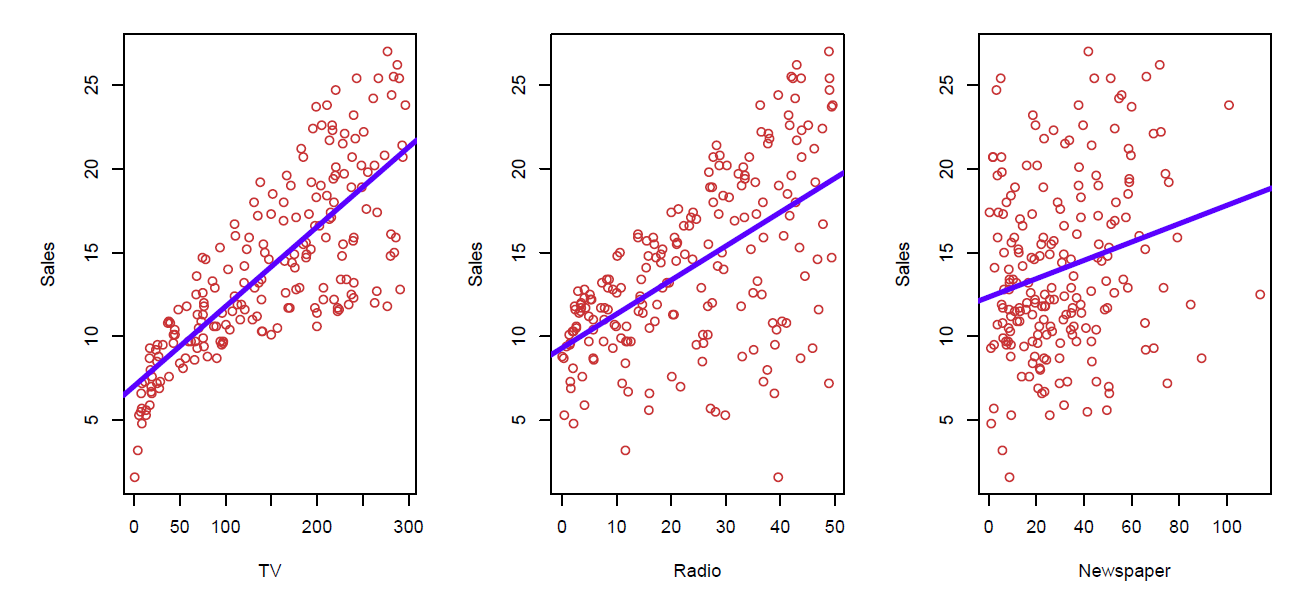

Sales에 대해 보다 정확한 예측을 위해서는 어떤 변수를 고려해야 할까?

TV? Radio? Newspaper? 아마 모두일 것이다.

위 그림을 보고 어떤 함수 $f$를 이용한 다음의 예측 모형을 생각해 볼 수 있다.

$$ \mathrm{Sales} \approx f(\mathrm{TV}, \mathrm{Radio}, \mathrm{Newspaper}) $$

### 표기법

여기서 Sales는 반응 (response) 변수 혹은 예측에 대한 target이 된다. 

보통 $Y$를 반응변수로 둔다.

TV나 Radio 등은 feature, input, 혹은 predictor라고 한다. 차례로 $X_1, X_2, X_3$라고 하겠다.

따라서 다음의 input vector를 고려할 수 있다.

$$ X = \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} $$

그리고 우리의 예측모형은 다음과 같이 쓸 수 있다.

$$ Y = f(X) + \epsilon $$

여기서 $\epsilon$은 측정 에러이다.

$f$가 예측을 잘 한다는 것은 어떤 의미인가?

이는 주어진 $X = x$ 값에 대해 $f$를 통해 계산된 $f(x)$를 실제 관찰된 반응변수 값 $Y$와 비교했을 때, 둘의 값이 거의 일치한다는 것을 의미한다.

모형의 복잡도가 그리 높지 않다면 입력변수가 반응변수에 어떻게 영향을 미치는지 파악할 수 있다. 

### $f$는 어떻게 구하는가?

먼저, 간단히 $X$가 1차원인 경우를 고려해 보자.

주어진 $X$에 대한 $Y$의 분포가 아래의 산점도와 같다고 가정하자.

아래의 상황에서 $f(X)$의 이상적인 값은 얼마일까? 예를 들어, $X=4$일 때, $f(X)$의 적절한 값은 무엇일까?

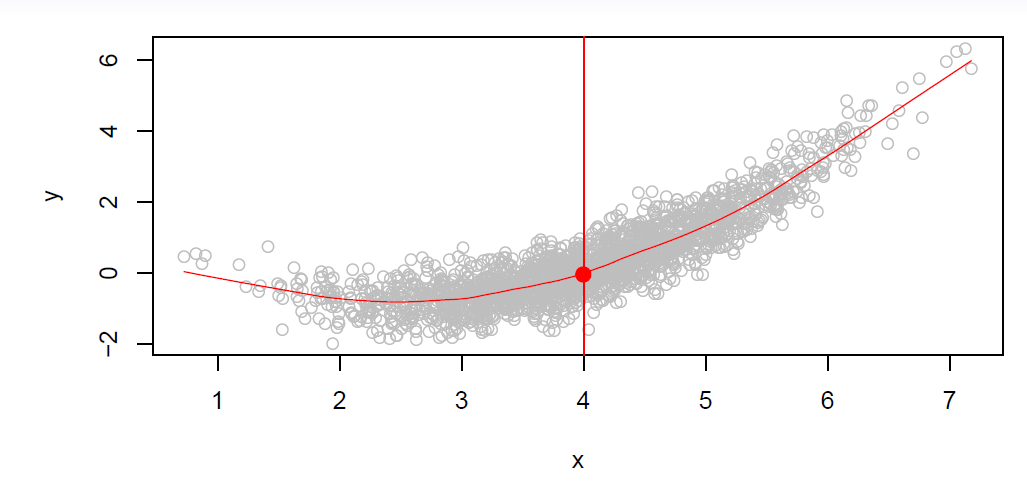

수학적으로 다음과 같이 표현할 수 있다.

$$ f(4) = \mathbb E [Y | X=4] $$

즉, $X=4$일 때 $Y$의 조건부 기댓값이다.

$ f(x) = \mathbb E [Y | X=x] $를 regression 함수라고 부른다.

벡터 $X$에 대해서도 다음과 같이 확장할 수 있다.

$$ f(x) = f(x_1, x_2, x_3) = \mathbb E [Y | X_1 = x_1, X_2 = x_2, X_3 = x_3] $$

또한, $f$는 mean-squared prediction error 관점에서 ideal 혹은 optimal predictor라고 불리우는데, 모든 함수 $g$에 대해 

$$ f(x) = \arg \min_{g}\mathbb E[(Y - g(X))^2 | X = x]$$

이기 때문이다.

$ \epsilon = Y - f(x) $는 irreducible 에러라고 하며, 우리가 $f$의 참값을 알더라도, $Y$의 랜덤성 때문에 발생하는 어쩔 수 없는 에러이다.

또한, 실제 문제에서는 $f$의 참값을 정확히 알지 못하기 때문에 이것의 추정치인 $\hat f$를 이용해야 한다.

$f$의 추정치인 $\hat f$에 대해,

$$ \mathbb E [(Y - \hat f(X))^2 | X = x ] = \mathbb E [ (f(x) - \hat f (x))^2 ] + \mathrm{Var} (\epsilon) $$

이며, 이 중 $ \mathbb E [ (f(x) - \hat f (x))^2 ]$는 reducible한 부분이고, $\mathrm{Var} (\epsilon)$는 irreducible한 부분이다.

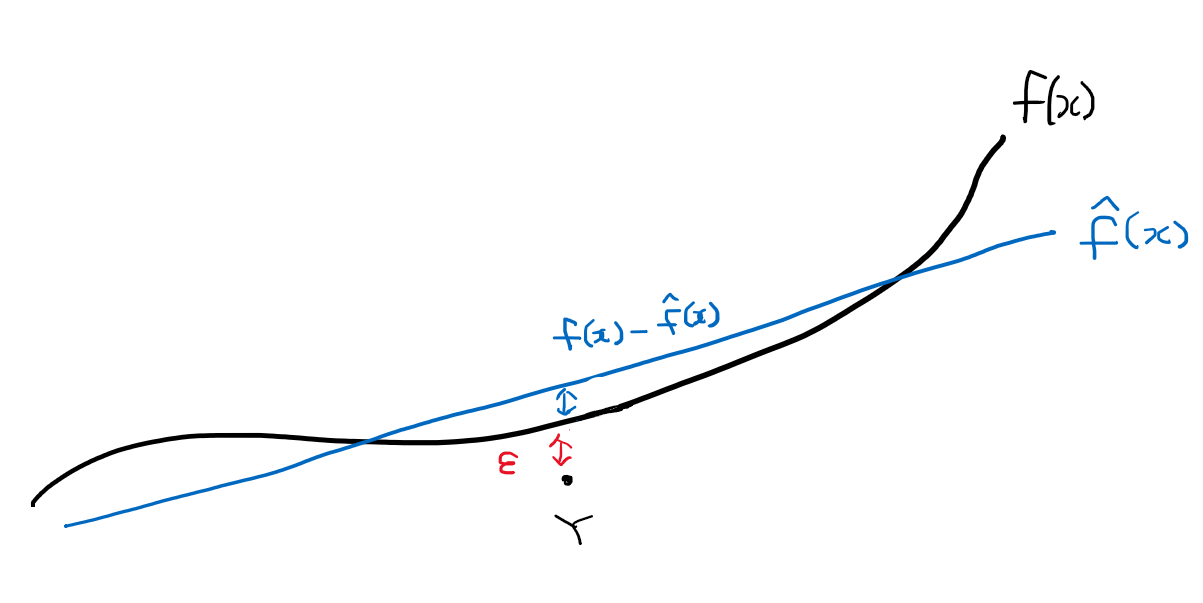

### $f$를 어떻게 추정해야 할까?

만약 $X$가 양적 변수라면, 일반적으로 정확히 $X=4$에 해당하는 데이터의 수는 매우 적거나 아예 없을 수도 있다.

따라서, 단순히 $X=x$인 데이터의 $Y$ 값들의 평균을 내는 방법으로는 $\mathbb E[Y | X=x]$를 정확하게 추정하기는 힘들다

보다 완화된 버전을 이용하여,

$$ \hat f(x) = \mathrm{Ave} ( Y | X \in \mathcal N (x)) $$

를 이용할 수 있다. 여기서 $\mathcal N (x)$는 $x$의 적절한 neighborhood를 의미하며, 일종의 local average라고 볼 수 있다.

즉, $X$가 $x$ 근방인 데이터들의 $Y$ 값들의 평균을 취하여 $\hat f(x)$를 추정하는 방법이다.

입력 변수의 수 $p$가 적고 총 데이터의 수 $N$이 충분히 크다면 위 neighborhood 방법은 잘 적용된다.

### 차원의 저주

하지만 $p$가 크다면 위 방법을 쉽게 적용할 수 없다. 이를 차원의 저주 (curse of dimensionality)라고 부른다.

$\mathrm{Ave} ( Y | X \in \mathcal N (x))$를 계산하기 위해, 예를 들어, 전체 데이터의 10%가 필요하다고 하자.

만약, 차원이 적다면 큰 문제는 없겠지만, 차원이 커지면 10% neighborhood는 더 이상 local이 아니게 된다.

즉, local averaging을 통해 $\mathbb E [Y | X=x]$를 계산하고자 했던 취지를 만족하지 못한다.

따라서, 단순 local averaging이 아닌, 앞으로 공부할 다양한 통계적 학습 기법을 이용해야 할 것이다.

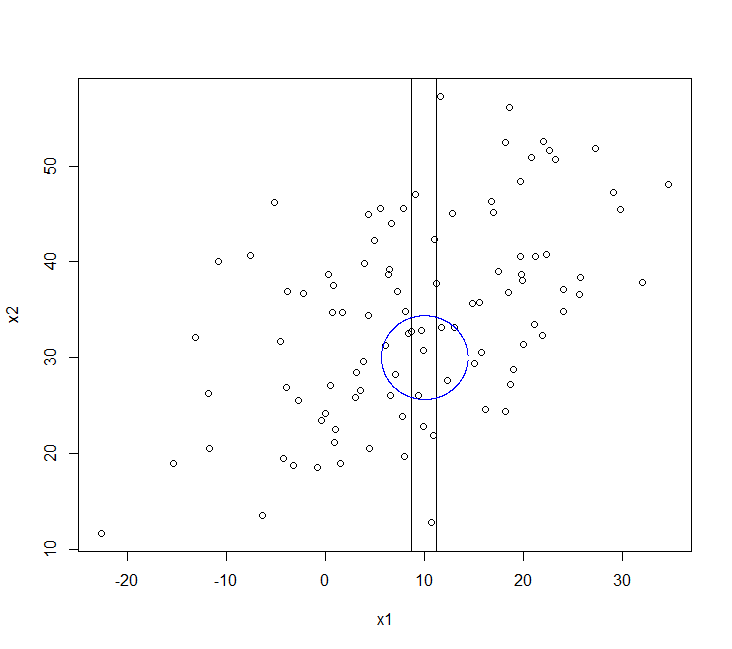

### Parametric model

선형모형은 parameteric model의 대표적인 예이다.

$$ f_L (X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p $$

간단한 선형모형은 비록 완벽히 맞는 일은 거의 없지만, $f$라는 true function에 대한 해석 가능한 근사치로 중요하게 사용된다.

선형모형은 이차모형 등으로 확장할 수 있다.

$$ f_Q (X) = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 $$

Income이라는 반응변수에 대한 다음의 적합된 모형들을 고려해 보자.

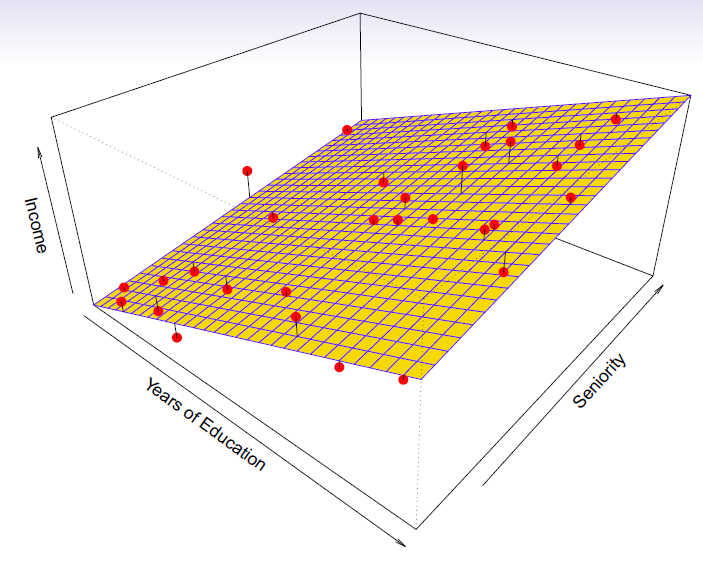

위 그림은 빨간 점들은 시뮬레이션으로 생성된 가상의 값이다.

이 값들에 선형모형을 적합하였다.

$$ \hat f_L (\mathrm{education}, \mathrm{seniority}) = \hat \beta_0 + \hat \beta_1 \times \mathrm{education} + \hat \beta_2 \times \mathrm{seniority} $$

빨간 점들과 평면 사이의 거리가 오차를 나타낸다.

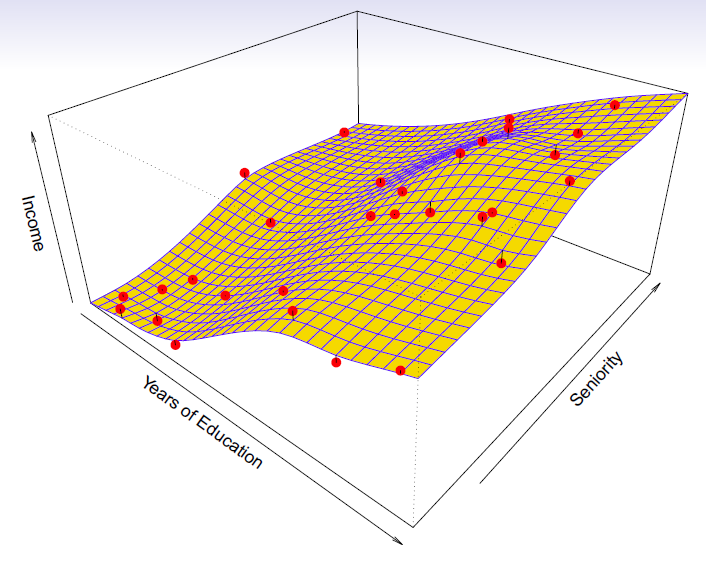

위 그림에서는 같은 데이터에 대해, thin-plate spline이라는 보다 flexible한 방법을 적용하였다.

앞의 선형모형과 비교하였을 때, 오차의 크기들이 줄어든 것을 볼 수 있다.

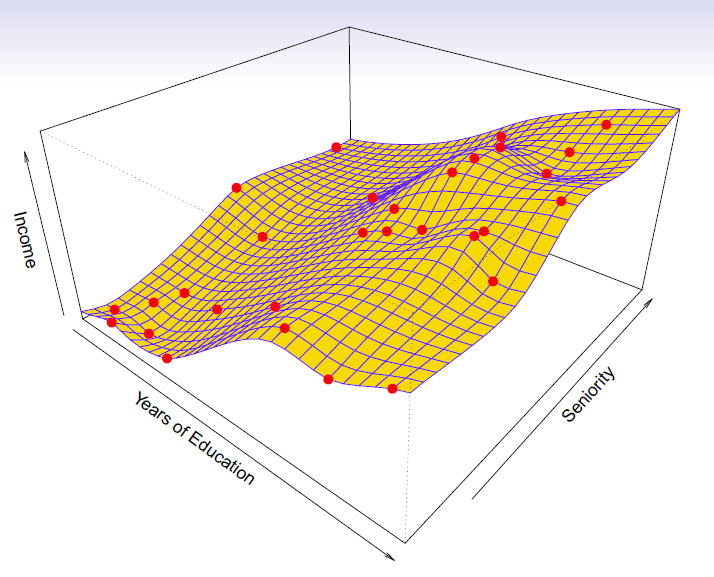

마지막으로 위 그림에서는 보다 더 flexible한 spline regression을 적용하였다. 

여기서는 적합된 모형이 아무런 오차를 발생하지 않는다.

하지만, 중요한 점은 오차가 없다고 해서 이 모형이 좋은 모형이라는 것이 아니다.

적합에 사용한 데이터가 아닌 새로운 데이터를 이용하여 테스트하면 아마도 큰 오차가 발생할 것이다.

이를 overfitting 되어 있다고 말한다.

### trade-off

예측 정확성 vs 해석 능력 (interpretability)

* 선형 모형은 해석 능력이 좋지만, thin-plate spline은 해석 능력이 떨어진다.

* 반면, thin-plate spline이 더 좋은 예측 정확성을 지닌다.

Good fit vs over-fit or under-fit

* 적절한 적합은 overfitting과 underfitting 사이에 위치한다. 그러면 정확히 어디쯤이 될 것인가?

* 위 예제에서 선형모형은 underfitting, 세번째 모형은 overfitting이다.

Parsimony vs black-box

* 모형 간결성이 대체로 좋으나 보다 높은 예측 성능을 위해 black-box predictor를 선택할 수도 있다.

### 모형 정확성 평가

훈련 데이터와 테스트 데이터

* 훈련 데이터 : 기계 학습 모델을 훈련하는 데 사용되는 초기 데이터
* 테스트 데이터 : 모델의 정확도를 평가하는데 사용됨


훈련 데이터 (training data) $\mathrm{Tr} = \{x_i, y_i\}_1^N $에 대한 어떤 모형 적합을 $\hat f(x)$라고 하자.

Average sqaured prediction error를 계산하여 모형의 정확성을 평가한다고 하자.

$$ \mathrm{MSE}_{\mathrm{Tr}} = \mathrm{Ave}_{i \in \mathrm{Tr}} [ y_i  - \hat f(x_i)]^2 $$

즉, $\mathrm{MSE}_{\mathrm{Tr}}$를 최소화하는 적합을 $\hat f$라 하면, 이는 overfit을 할 가능성이 높다.

이보다는 테스트 데이터 $\mathrm{Te} = \{x_i, y_i\}_1^M $를 따로 선정하여 다음을 최소화하는 적합을 찾아야 한다.

$$ \mathrm{MSE}_{\mathrm{Te}} = \mathrm{Ave}_{i \in \mathrm{Te}} [ y_i  - \hat f(x_i)]^2 $$

모델이 이미 훈련 데이터를 알고 있기 때문에 모델을 검증하려면 새 데이터 세트가 필요하다.

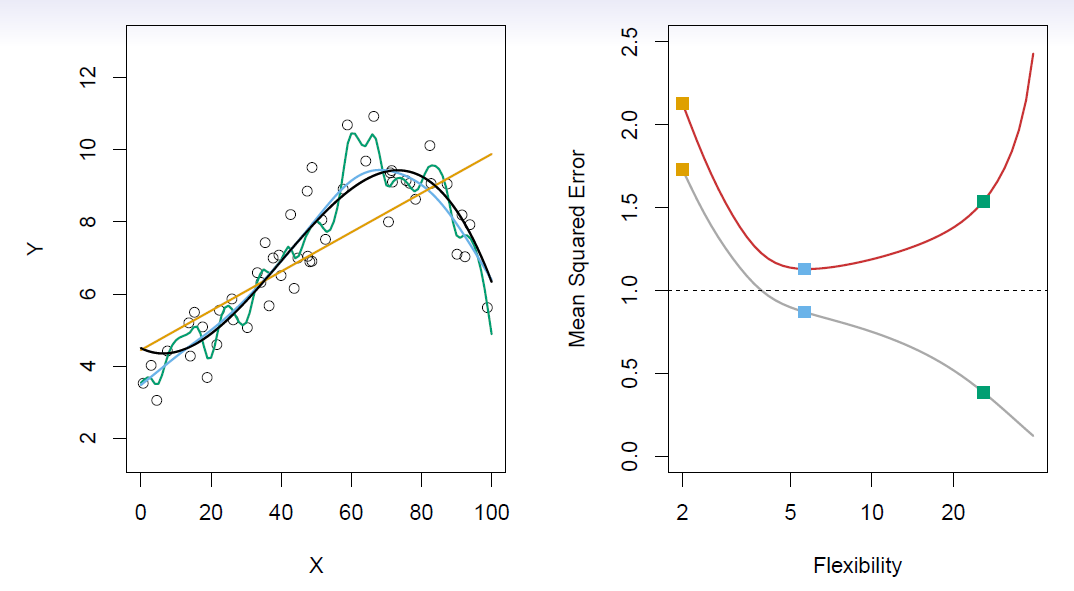

위 그림의 좌측에서 검은 선이 실제 $f$이다.

점들은 $f$에 오차가 포함된 관찰값, 즉, 실제 $Y$값들이다.

오렌지색, 파란색, 초록색 선들은 서로 다른 flexibility를 가지는 모형에 대한 적합 결과이다.

오른쪽 그림의 빨간선은 모형의 flexibility에 따른 $\mathrm{MSE}_{\mathrm{Te}}$이고 회색선은 $\mathrm{MSE}_{\mathrm{Tr}}$에 대한 것이다.

오른쪽 그림에서 파란색 네모가 가장 작은 $\mathrm{MSE}_{\mathrm{Te}}$를 가지며 가장 잘 적합된 모형을 의미한다.

$\mathrm{MSE}_{\mathrm{Tr}}$는 결국 모형이 복잡할수록 작은 값을 가지는 경향이 있으며, $\mathrm{MSE}_{\mathrm{Tr}}$가 모형 평가에 이용되기 힘든 면을 보여준다.

주확색 선형 모형은 underfitting을 초록색 복잡한 모형은 overfitting의 결과를 나타낸다.

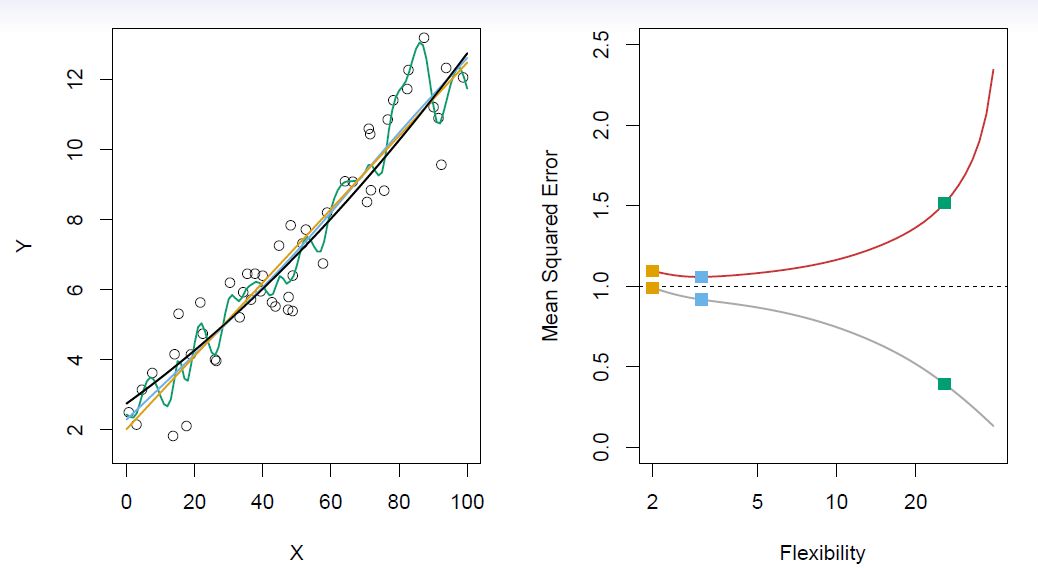

위 그림의 두 번째 예제는 $f$의 참값이 직선에 가까운 경우이다.

따라서, 선형 모형의 적합인 오렌지색 또한 매우 작은 $\mathrm{MSE}_{\mathrm{Te}}$를 가진다.

초록색은 전형적인 overfitting의 모양을 보이며, 비록 작은 $\mathrm{MSE}_{\mathrm{Tr}}$를 가지더라도 높은 $\mathrm{MSE}_{\mathrm{Te}}$를 가져 적합에 사용되었던 훈련 데이터가 아닌 새로운 테스트 데이터에는 안 좋은 성능을 보임을 알 수 있다.

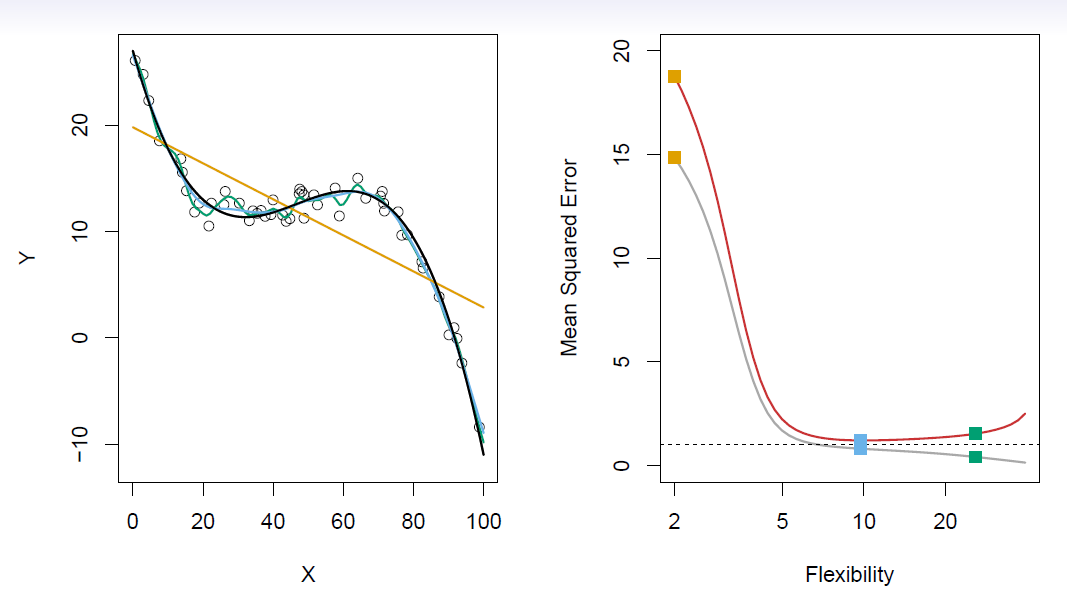

마지막으로 true $f$ 자체가 복잡한 함수의 예제이다.

이 경우는 바로 전 예제와는 달리 선형 모형이 가장 큰 $\mathrm{MSE}_{\mathrm{Te}}$를 가지며 가장 안 좋은 성능을 보임을 알 수 있다.

### Bias-Variance Trade-off

Fit model : $\hat f(x)$  with training data $\mathrm{Tr}$

True model : $Y = f(X) + \epsilon$

테스트 관찰값 $(x_0, y_0)$에 대해 다음의 식이 성립한다.

$$ \mathbb E \left( y_0 -  \hat f (x_0) \right)^2 = \mathrm{Var}(\hat f (x_0)) + [\mathrm{Bias}(\hat f(x_0))]^2 + \textrm{Var}(\epsilon)$$

* 여기서 $\textrm{Var}(\hat f(x_0))$는 훈련 데이터 $\mathrm{Tr}$가 바뀌었을 때 변화하는 $\hat f$의 변동이다. $\hat f$는 훈련 데이터에 의해 결정되며 훈련 데이터가 바뀐다면 $\hat f$도 변한다.

   

* $\mathrm{Bias}(\hat f(x_0)) = \mathbb E[\hat f(x_0)] - f(x_0)$로서 적합된 모형이 실제 모형과 다른 정도를 나타낸다.

$[\mathrm{Bias}(\hat f(x_0))]^2$와 $\mathrm{Var}(\hat f (x_0))$의 관계를 Bias-Variance trade-off라고 한다.

* 모형의 flexibility가 올라가면 $\mathrm{Var}(\hat f (x_0))$가 증가한다. 
  * 높은 복잡도의 모형에서는 훈련 데이터가 바뀌면 $\hat f$도 크게 바뀔 것이다. 
  * 반면, 모형의 복잡도가 높으면 $\mathbb E[\hat f] \approx f$가 되며, $[\mathrm{Bias}(\hat f(x_0))]^2$는 감소한다.

  
* 모형의 flexibility가 낮아지면 $[\mathrm{Bias}(\hat f(x_0))]^2$가 증가한다. 
  * 모형이 간단하면 $\mathbb E[\hat f]$가 $f$와 충분히 가깝지 않을 가능성이 높다.이에 bias가 증가한다. 
  * 반면, 훈련 데이터가 바뀌어도 $\hat f$가 크게 바뀌진 않을 것이다.

전체 변동 $\mathbb E \left( y_0 -  \hat f (x_0) \right)^2$을 줄이려면, bias와 variance가 동시에 낮아지는 지점을 찾아야 한다.

이는 통상적으로 테스트 에러를 가장 최소화하는 flexibility를 가지는 모형을 선택함으로서 이루어진다.

과적합(overfitting) 모형에서는 $\textrm{Var}(\hat f(x_0))$가 높고, 과소적합(underfitting)된 모형에서는 $[\mathrm{Bias}(\hat f(x_0))]^2$가 높다.

아래 그림은 위 예제들의 bias-variance 관계를 보여준다.

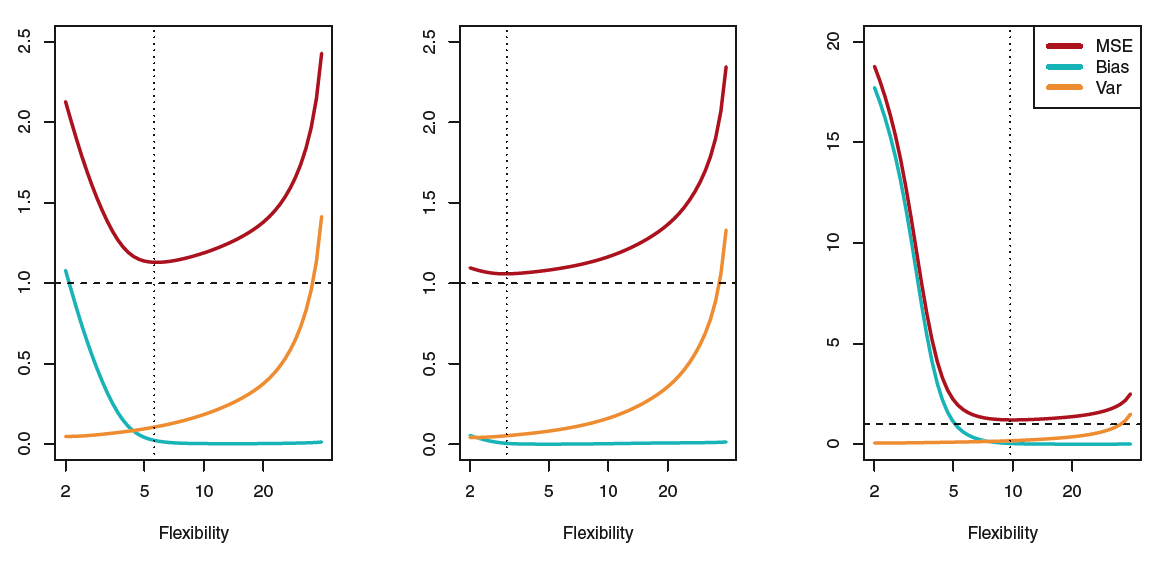

### 분류 (Classification) 문제

지금까지는 regression 문제들에 대해 생각해 보았다. 이제 분류 문제를 생각해 보자.

예를 들어, 이메일은 $\mathcal C = (\mathrm{spam}, \mathrm{ham})$ 중의 하나로 구분할 수 있다.

이처럼 반응변수 $Y$가 질적 변수일 때, 우리는 다음의 일들을 할 수 있다.

* 분류기 (classifier) $C (X)$를 만들어 미래에 관찰되는 관찰값 $X$를 $\mathcal C$ 중의 하나로 분류한다.

* 분류 작업에 있어 불확실성을 평가한다.

* 예측 변수인 $X=(X_1, \cdots, X_p)$의 역할을 연구한다.

이상적인 $C(X)$는 무엇일까?

$\mathcal C$에 $K$개의 원소가 있고, 이를 $1,2,\cdots, K$라고 하자. 그리고

$$ p_k(x) = \mathbb P (Y=k | X=x), \quad k=1, \cdots, K$$

라고 하면, 이를 $x$에서의 conditional class probability라고 할 수 있다.

그러면 $x$에서의 Bayes optimal classifier (새로운 데이터에 대해 가장 가능성 높은 예측을 하는 확률 모델)는 다음과 같이 정의된다.

$$ C(x) = j \textrm{ if } p_j(x) = \max \{p_1(x), p_2(x), \cdots, p_K(x) \} $$



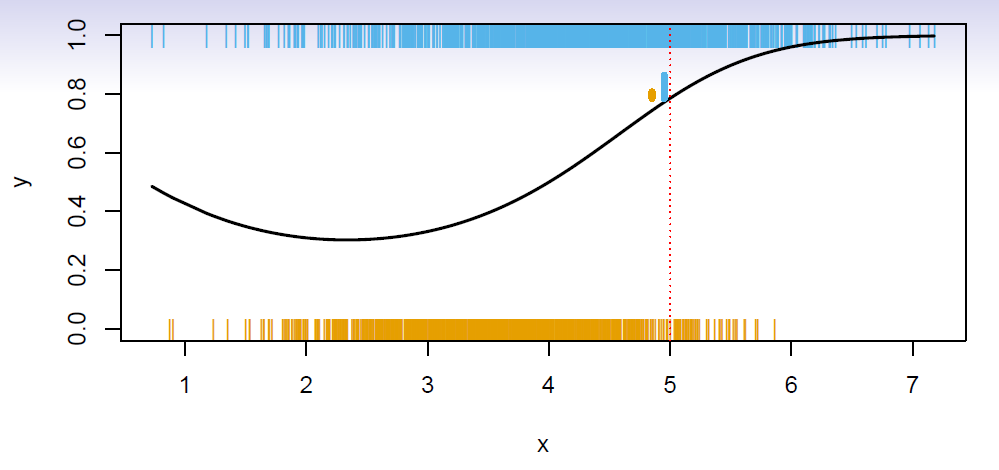

위 그림에서 $Y=0$ 혹은 $Y=1$의 값을 가지는 분류 문제이다.

* 아래쪽 라인에 붙어있는 노란색 점들은 $Y=0$일 때 $X$의 true 분포를 나타낸다.

* 위쪽 라인에 붙어있는 파란색 점들은 $Y=1$일 때 $X$의 true 분포를 나타낸다.

* 검은 곡선은 $p_1(X)$이다. 

예를 들어, 위 그림에서 $x=5$일 때, $Y=0$일 조건부 확률 $p_0(5)$는 검은 색 곡선에 붙어있는 노란색 막대 (bar)로, $Y=1$일 조건부 확률 $p_1(5)$는 파란색 막대로 나타나 있다.

따라서, Bayes optimal classifier에 따르면, $C(5) = 1$이다.

그러면, $C$는 어떻게 추정하는가? 

아래 그림에서 아래쪽과 위쪽의 노란색 혹은 파란색 점들은 데이터에서의 $X$의 분포를 나타낸다.

예전에 언급했던 nearest-neighbor averaging 방법을 사용해 볼 수 있겠다. 

아래의 그림에서 빨간 점선이 가상의 neighborhood를 나타낸다.

그리고 초록색 선은 neighborhood의 데이터를 이용하여 추정한 확률로 계산한 추정치이다.

예를 들어, $\hat C(5)$는 $x=5$의 근방에서 $Y=0$인 케이스가 3개, $Y=1$인 케이스가 7개 발견되었다고 하면,

$\hat p_0(5) = 0.3, \enspace  \hat p_1(5) = 0.7$이고, $\hat C(5) = 1$이다.

초록색 선은 $\hat p_1(x)$이다. 

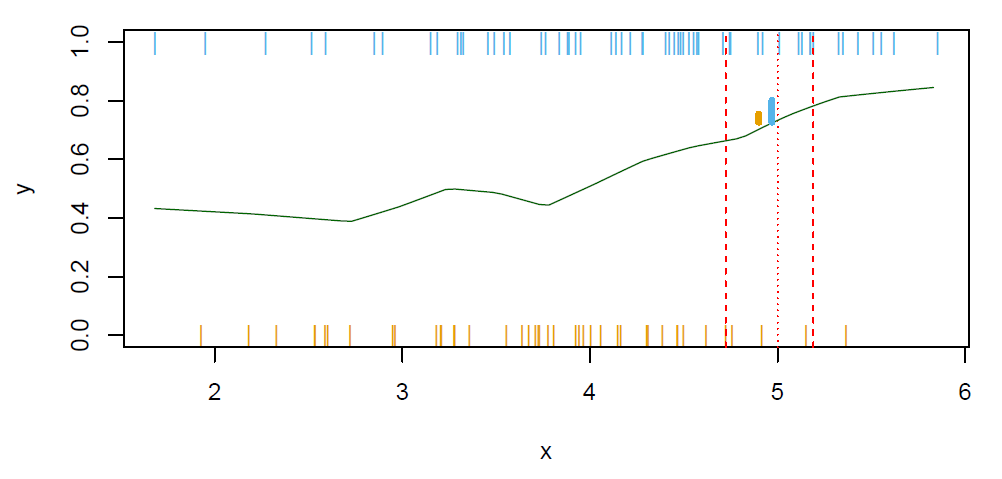

이전과 마찬가지로 차원이 증가하면, 이 방법은 어려워진다. 

다만, 차원증가에 따른 추정의 어려움은 $\hat p_k(x)$에서 보다는 $\hat C(x)$에서 더 적다고 한다.

$\hat C(x)$의 성능 측정은 보통 다음의 에러 비율로 측정한다.

$$ \mathrm{Err}_{\mathrm{Te}} = \mathrm{Ave}_{i \in \mathrm{Te}} I [y_i \neq \hat C (x_i)] $$

여기서 $I$는 characteristic function으로 $y_i \neq \hat C (x_i)$일 경우 1의 값을, 그 외에는 0의 값을 가진다.

즉, 추정된 분류기 $\hat C(x)$에 의한 분류가 잘못된 경우의 비율을 계산한다.

앞에서 언급한, $p_k(x)$의 참값을 이용한 Bayes classifier가 가장 작은 에러를 가진다. 물론 현실에서는 true $p_k(x)$를 알긴 힘들다.

앞으로 공부할 support vector machine은 $C(x)$를 어떻게 추정할지 연구한다.

Logistic regression이나 generalized additive 모형에서는 $p_k(x)$를 어떻게 추정할지 연구한다.

### K-nearest neighbors

앞서 설명했듯이, $p_k(x)$는 알지 못하기 때문에 현실에서 Bayes classifier를 이용하기는 힘들다.

대신 $p_k(x)$의 추정치인 $\hat p_k(x)$를 이용하여 분류하는 경우가 많다.

그 중의 한 예는 K-nearest neighbors (KNN) 방법이다.

KNN에서는 테스트 데이터 $x_0$의 근처에 있는 $K$개의 훈련 데이터 관찰값들을 $x_0$의 neighbor인 $\mathcal N_0$로 정한다.

그리고, 클래스  $j$에 대한 조건부 확률을 $\mathcal N_0$ 중 반응변수의 값이 $j$에 속하는 비율로 추정한다. 즉,

$$ \hat p_k(x_0) =  \frac{1}{K} \sum_{i \in \mathcal N_0} I (y_i = j) $$

추정된 조건부 확률을 비교하여 가장 큰 값을 가지는 조건부 확률 해당하는 클래스가 새로운 테스트 관찰값 $x_0$의 클래스로 추정된다.

KNN은 자연수 $K$의 값을 무엇으로 하는가에 따라 분류 결과가 달라진다.

$K$가 작을수록 overfitting이 되고 $K$가 클수록 underfitting이 된다. 아래의 그림들을 보며 비교하자. 

보라색 점선이 Bayes optimal classifier에 의한 실제 경계선이다.

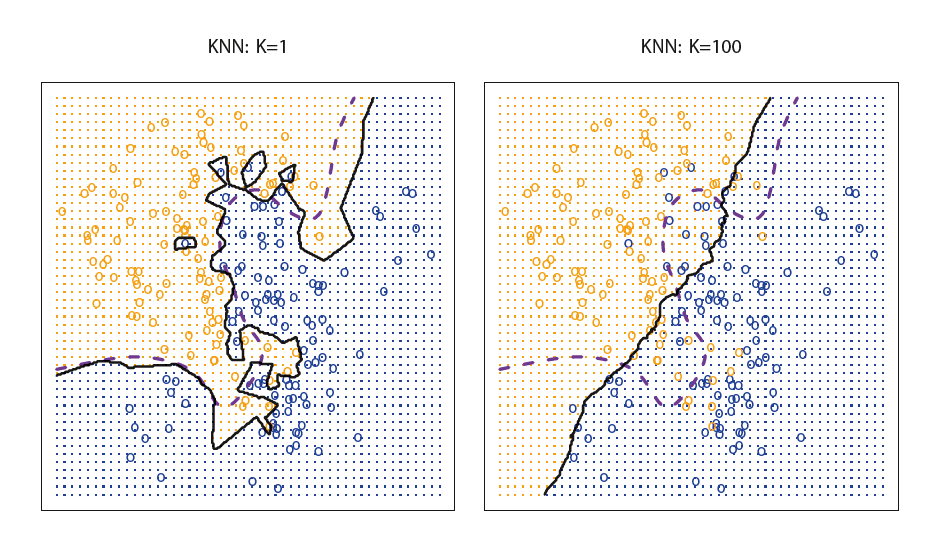

가장 좋은 분류기의 $K$는 1과 100의 중간 어디에 위치할 것이다. 

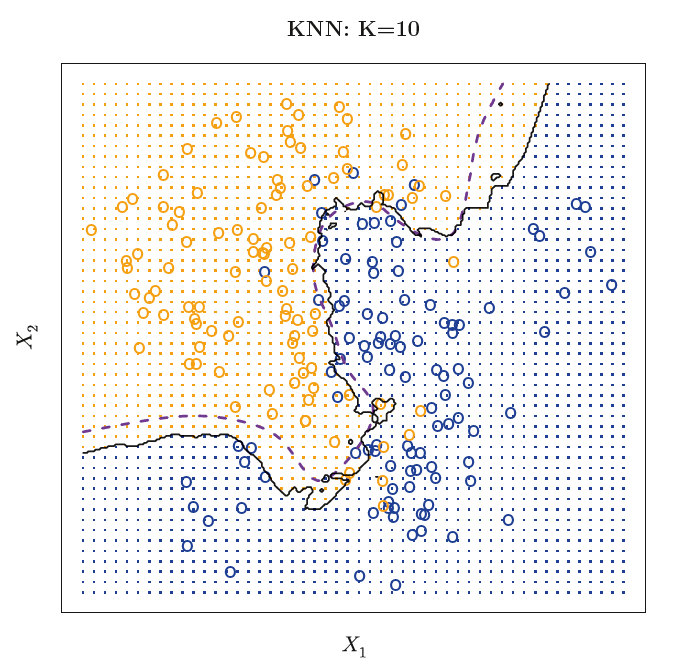

다음 그림은 training error와 test error를 $1/K$의 그래프로 표현하였다.

모형의 flexibility ($1/K$)가 증가할수록 training error의 크기는 점점 작아진다.

반면, test error는 $1/K = 0.1$ 근방에서 최저가 되었다가 다시 증가한다.

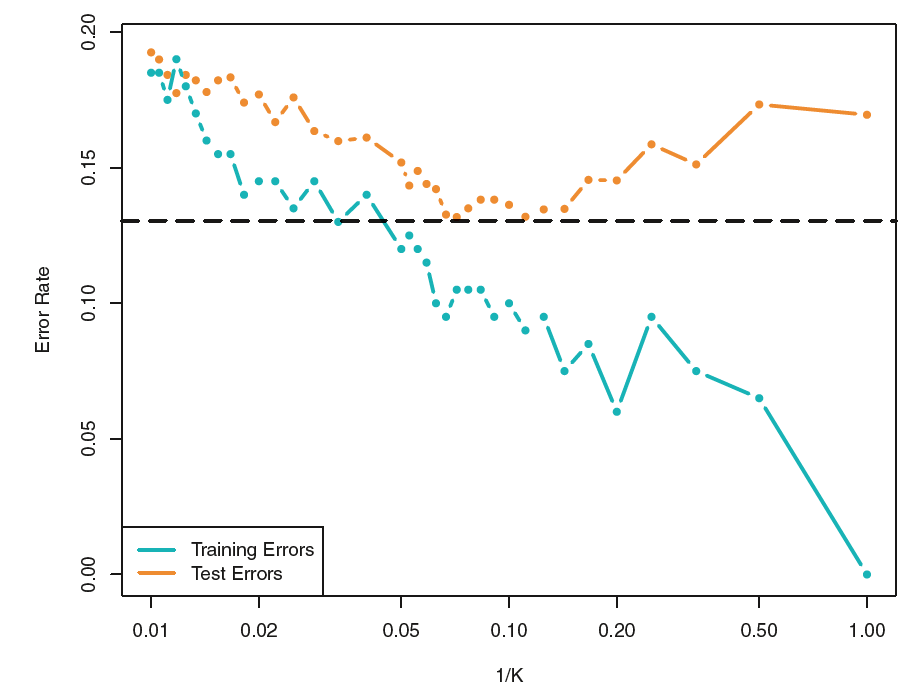

### 행렬 표현법


일반적으로 $x_{ij}$를 $j$번째 입력변수의 $i$번째 관찰값으로 정의한다. 여기서 $i=1,2,\cdots,N$이고 $j=1,\cdots,p$이다.


그러면 $x_{ij}$로 이루어진 $N \times p$ 행렬 $\mathbf{X}$를 생각할 수 있다.

$$ 
\mathbf{X} = \begin{bmatrix} 
    x_{11} & x_{12} & \cdots & x_{1p}\\
    x_{21} & x_{22} & \cdots & x_{2p}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N1} & x_{N2} & \cdots & x_{Np}  
    \end{bmatrix}
$$

$i$번째 관찰값들인 행들은 $x_i$로 표현한다. 즉, $x_i$는 총 $p$개의 값을 지니며,

$$ x_i = \begin{bmatrix} x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}\end{bmatrix} $$

이다.

$j$번째 입력변수의 모든 관찰값은 $\mathbf{x}_j$로 표현한다. 즉, $\mathbf{x}_j$는 총 $N$개의 값을 지니며,

$$ \mathbf{x}_j = \begin{bmatrix} x_{1j} \\ x_{2j} \\ \vdots \\ x_{Nj} \end{bmatrix}$$

이다.

또한 반응변수들의 관찰값 또한 벡터로서 표현된다.

$$ \mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} $$